In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
df['education'].fillna(method = 'ffill', inplace = True)
df['previous_year_rating'].fillna(method = 'ffill', inplace = True)


In [8]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
df['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

Text(0.5, 1.0, 'Department Count')

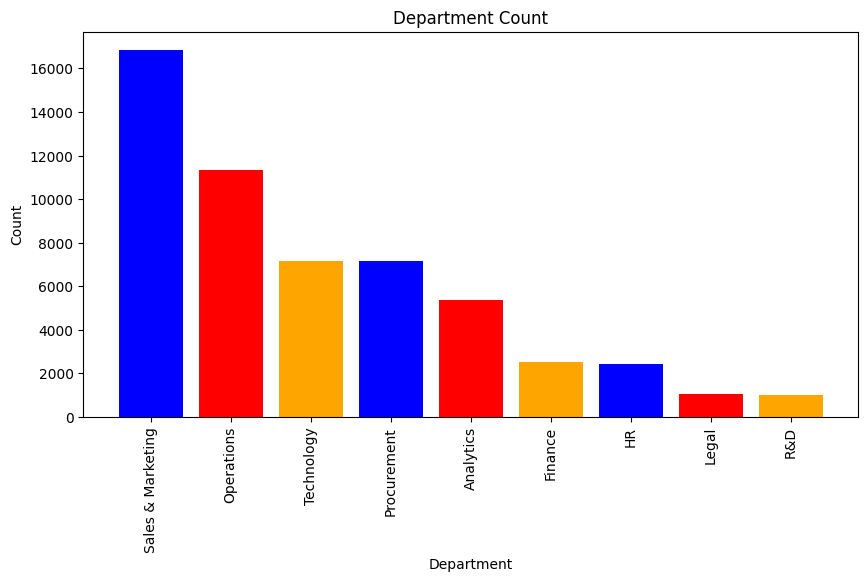

In [11]:
plt.figure(figsize = (10, 5))
plt.bar(df['department'].value_counts().index, df['department'].value_counts(), color = ['blue', 'red', 'orange'])
plt.xticks(rotation = 90)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Department Count')

In [12]:
df['education'].value_counts()

education
Bachelor's          38390
Master's & above    15579
Below Secondary       839
Name: count, dtype: int64

Text(0.5, 1.0, 'Education Count')

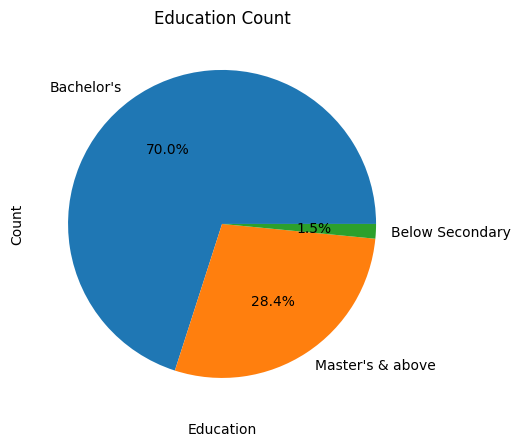

In [13]:
plt.figure(figsize = (8, 5))
plt.pie(df['education'].value_counts(), labels = df['education'].value_counts().index, autopct = '%0.1f%%')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Count')

In [14]:
df['gender'].value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Count')

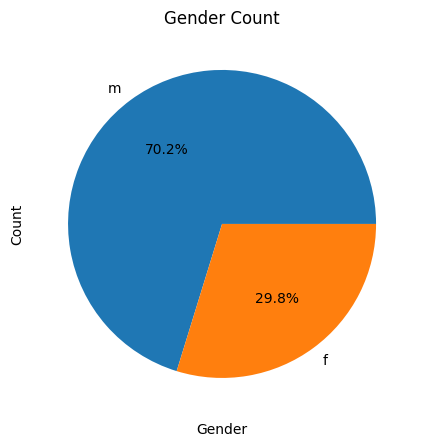

In [15]:
plt.figure(figsize = (8, 5))
plt.pie(df['gender'].value_counts(), labels = df['gender'].value_counts().index, autopct = '%0.1f%%')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

<Figure size 1000x500 with 0 Axes>

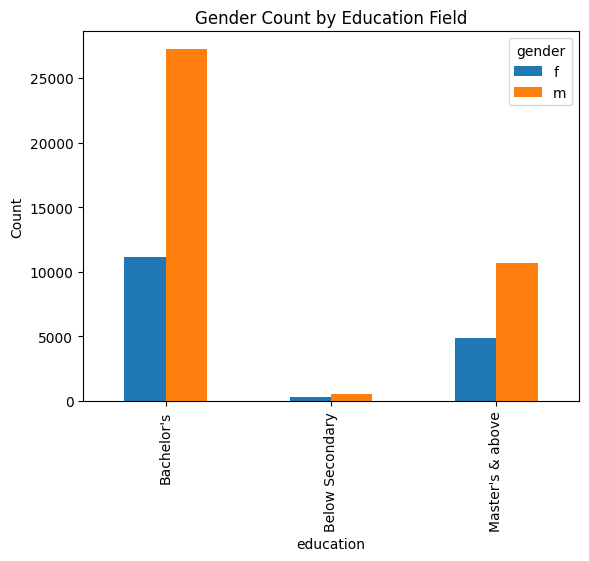

In [16]:
grouped_data = df.groupby(['education', 'gender'])['gender'].count().unstack()

plt.figure(figsize=(10, 5))
grouped_data.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Gender Count by Education Field')
plt.show()

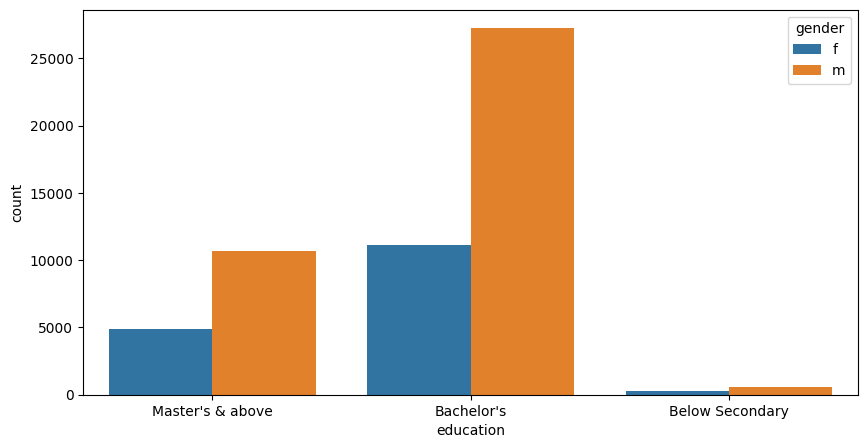

In [17]:
# Using Seaborn Libraries
plt.subplots(figsize = (10, 5))
sns.countplot(x = 'education', data = df, hue = 'gender')
plt.show()

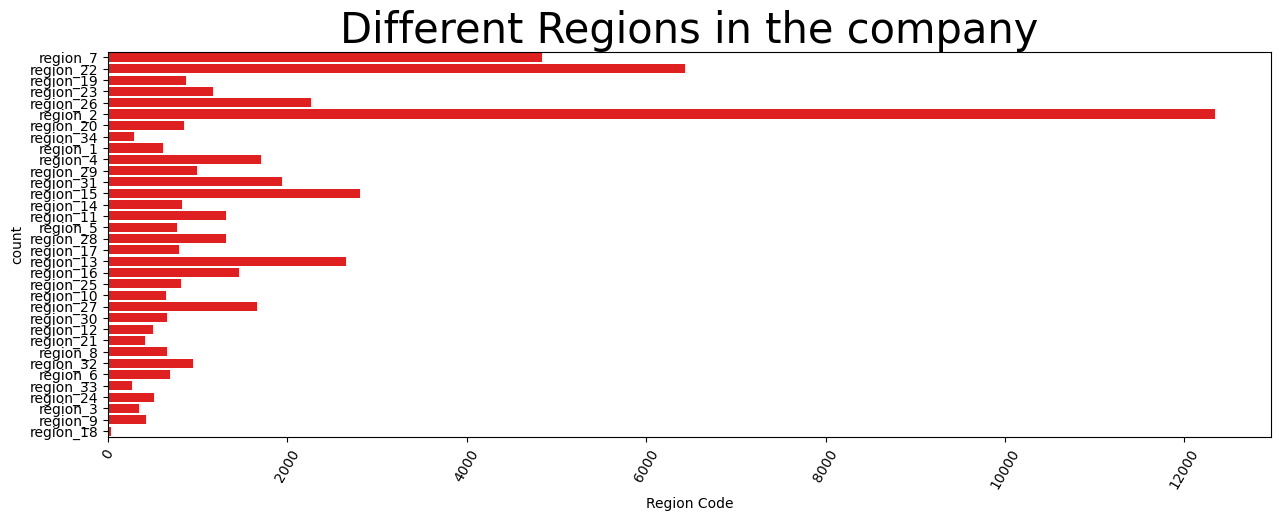

In [18]:
plt.subplots(figsize=(15,5))
sns.countplot(df['region'], color = 'red')
plt.title('Different Regions in the company', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Region Code')
plt.ylabel('count')
plt.show()


Text(0.5, 1.0, 'is_promoted Count')

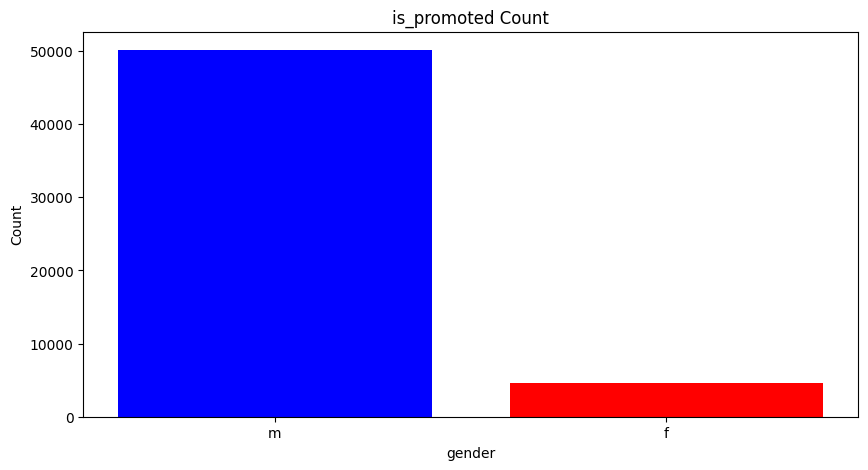

In [19]:
plt.figure(figsize = (10, 5))
plt.bar(df['gender'].value_counts().index, df['is_promoted'].value_counts(), color = ['blue', 'red'])
plt.xlabel('gender')
plt.ylabel('Count')
plt.title('is_promoted Count')

In [20]:
df['recruitment_channel'].value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

Text(0.5, 1.0, 'recruitment_channel Count')

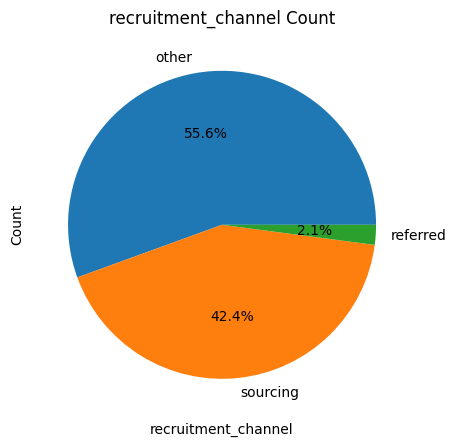

In [21]:
plt.figure(figsize = (10, 5))
plt.pie(df['recruitment_channel'].value_counts(), labels = df['recruitment_channel'].value_counts().index, autopct = '%0.1f%%')
plt.xlabel('recruitment_channel')
plt.ylabel('Count')
plt.title('recruitment_channel Count')

<Figure size 1000x500 with 0 Axes>

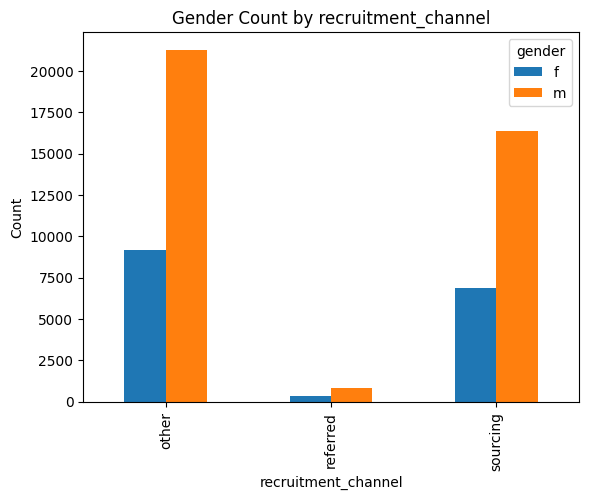

In [22]:
# prompt: bar graph of  between recruitment_channel and gender using matplotlib library

grouped_data = df.groupby(['recruitment_channel', 'gender'])['gender'].count().unstack()

plt.figure(figsize=(10, 5))
grouped_data.plot(kind='bar')
plt.xlabel('recruitment_channel')
plt.ylabel('Count')
plt.title('Gender Count by recruitment_channel')
plt.show()


<ipython-input-23-8ff502a878f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


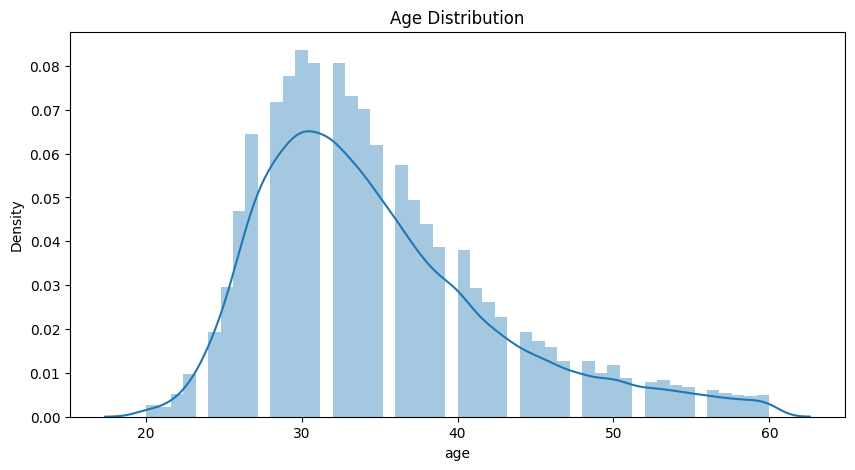

In [23]:
plt.subplots(figsize = (10, 5))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'previous_year_rating Count')

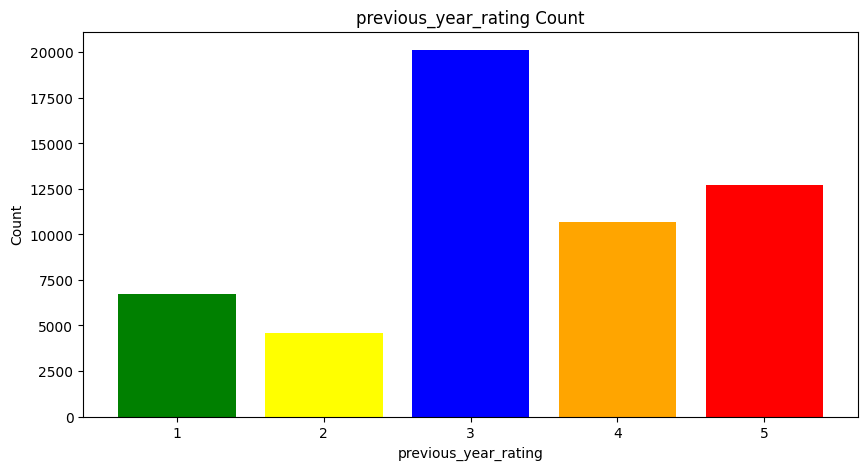

In [24]:
plt.figure(figsize = (10, 5))
plt.bar(df['previous_year_rating'].value_counts().index, df['previous_year_rating'].value_counts(), color = ['blue', 'red', 'orange', 'green', 'yellow'])
plt.xlabel('previous_year_rating')
plt.ylabel('Count')
plt.title('previous_year_rating Count')

<ipython-input-25-519cf5d15362>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length_of_service'], color = 'red')


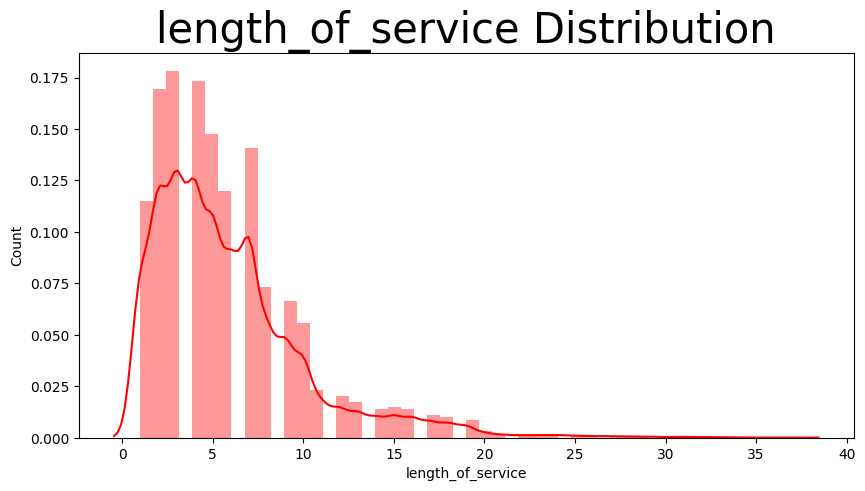

In [25]:
plt.subplots(figsize = (10, 5))
sns.distplot(df['length_of_service'], color = 'red')
plt.title('length_of_service Distribution', fontsize = 30)
plt.xlabel('length_of_service')
plt.ylabel('Count')
plt.show()

In [26]:
df['KPIs_met >80%'].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

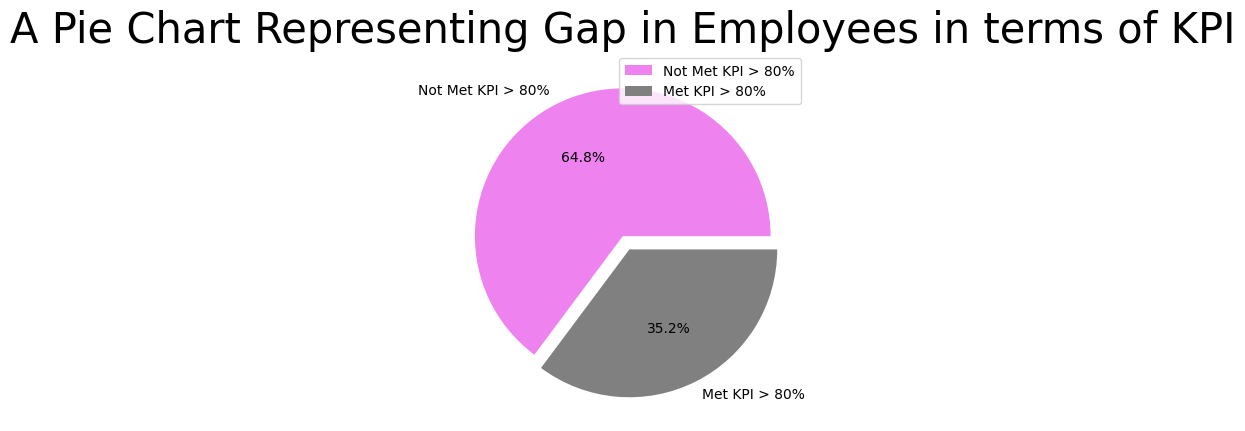

In [27]:
size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct = '%0.1f%%')
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [28]:
df['awards_won?'].value_counts()

awards_won?
0    53538
1     1270
Name: count, dtype: int64

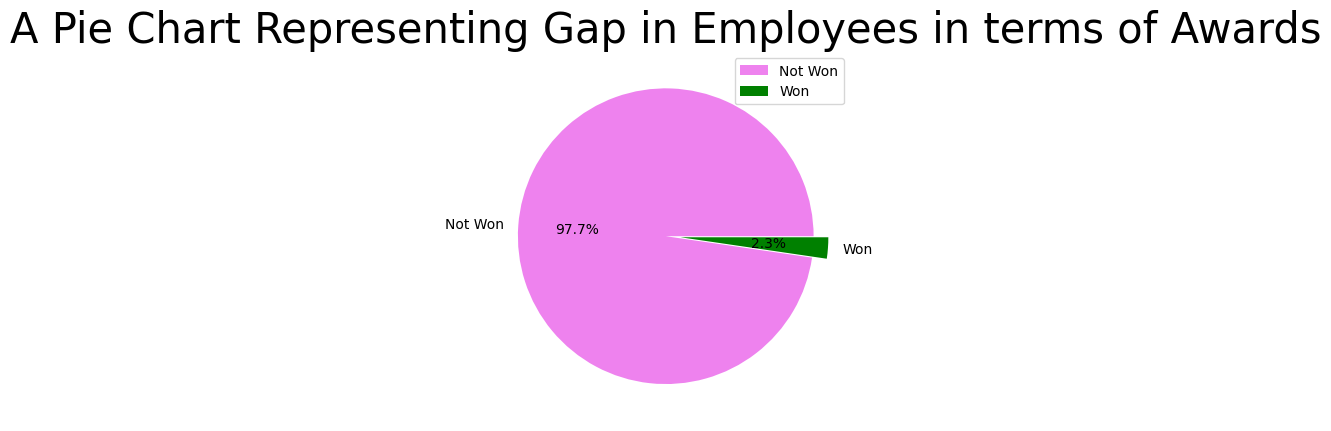

In [30]:
size = [53538, 1270]
label = "Not Won", "Won"
colors = ['violet', 'green']
explode = [0, 0.1]
plt.pie(size, labels = label, colors = colors, explode = explode, autopct = '%0.1f%%')
plt.title('A Pie Chart Representing Gap in Employees in terms of Awards', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [31]:
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

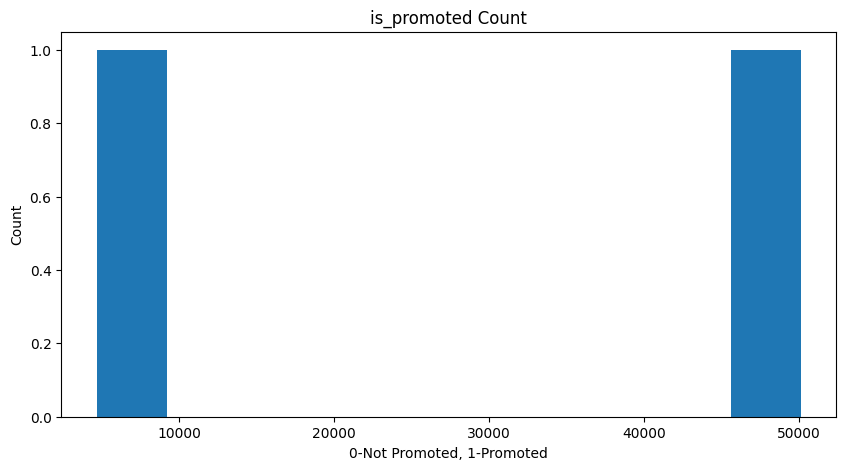

In [32]:
plt.figure(figsize = (10, 5))
plt.hist(df['is_promoted'].value_counts())
plt.xlabel('0-Not Promoted, 1-Promoted')
plt.ylabel('Count')
plt.title('is_promoted Count')
plt.show()

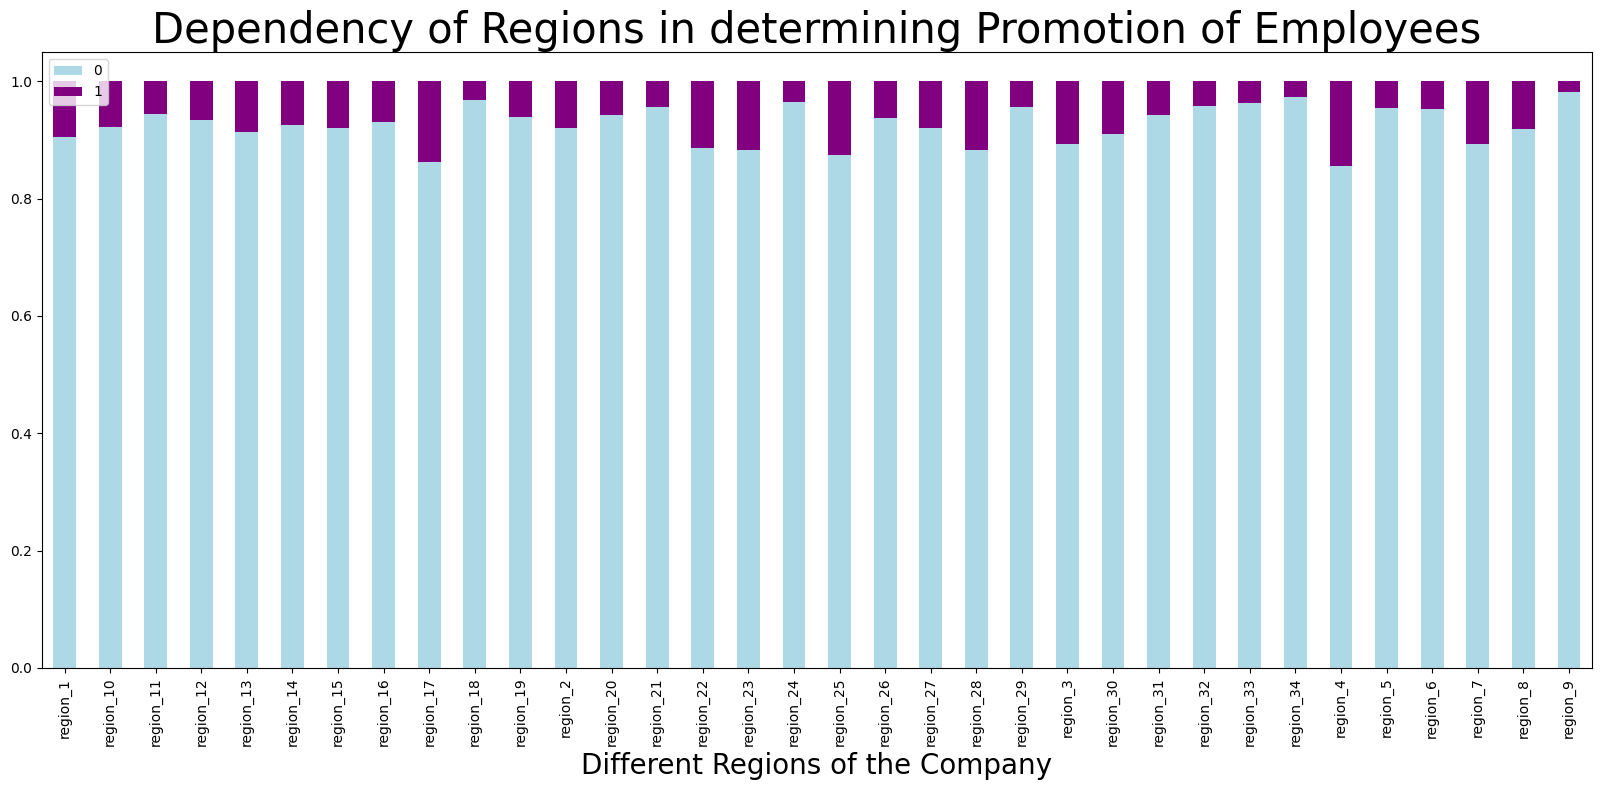

In [35]:
# checking dependency of different regions in promotion

data = pd.crosstab(df['region'], df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()


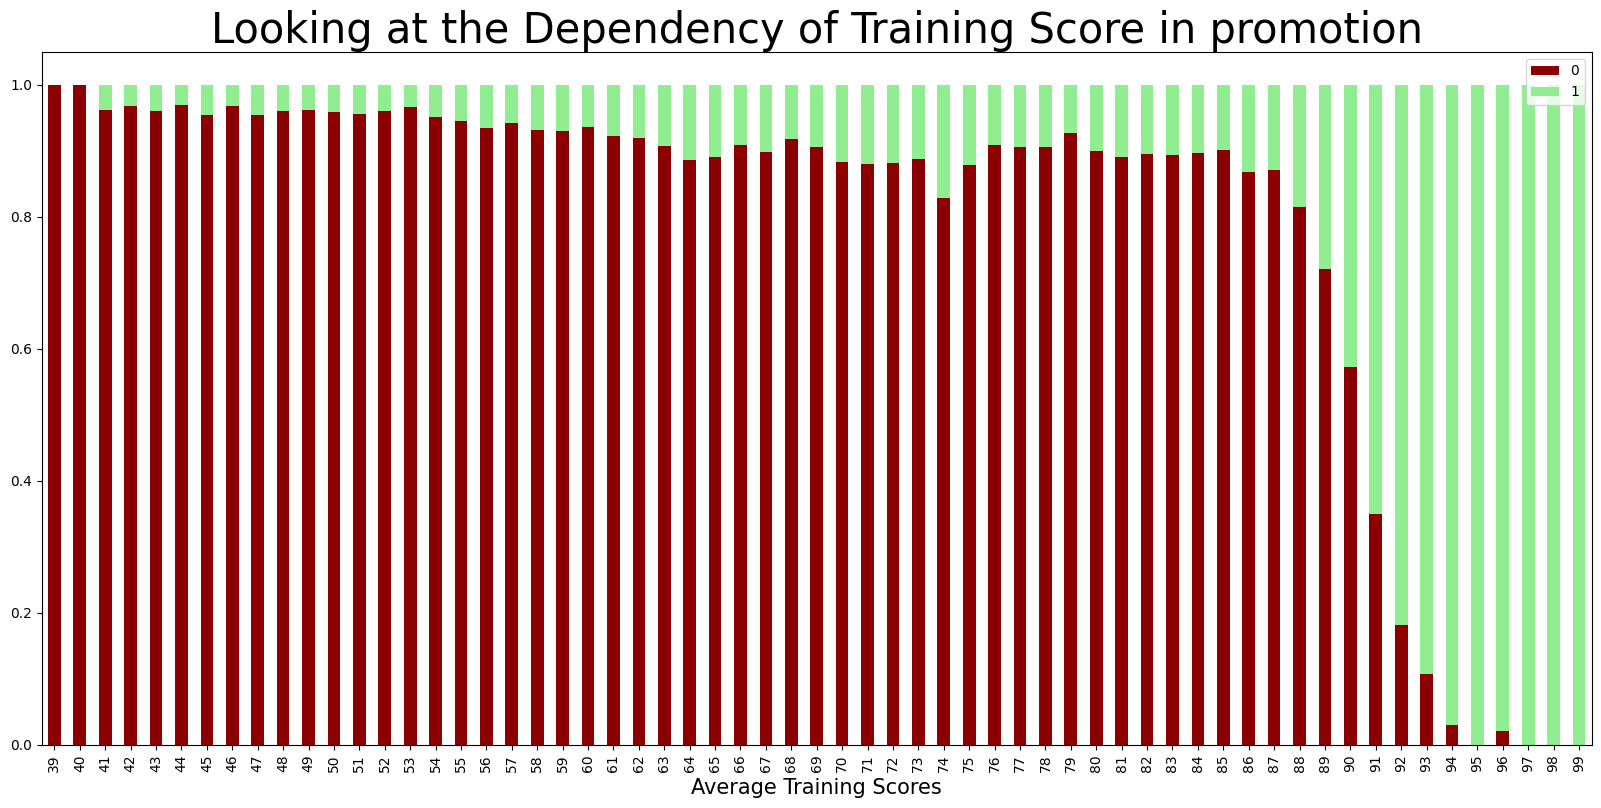

In [36]:
# scatter plot between average training score and is_promoted

data = pd.crosstab(df['avg_training_score'], df['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()


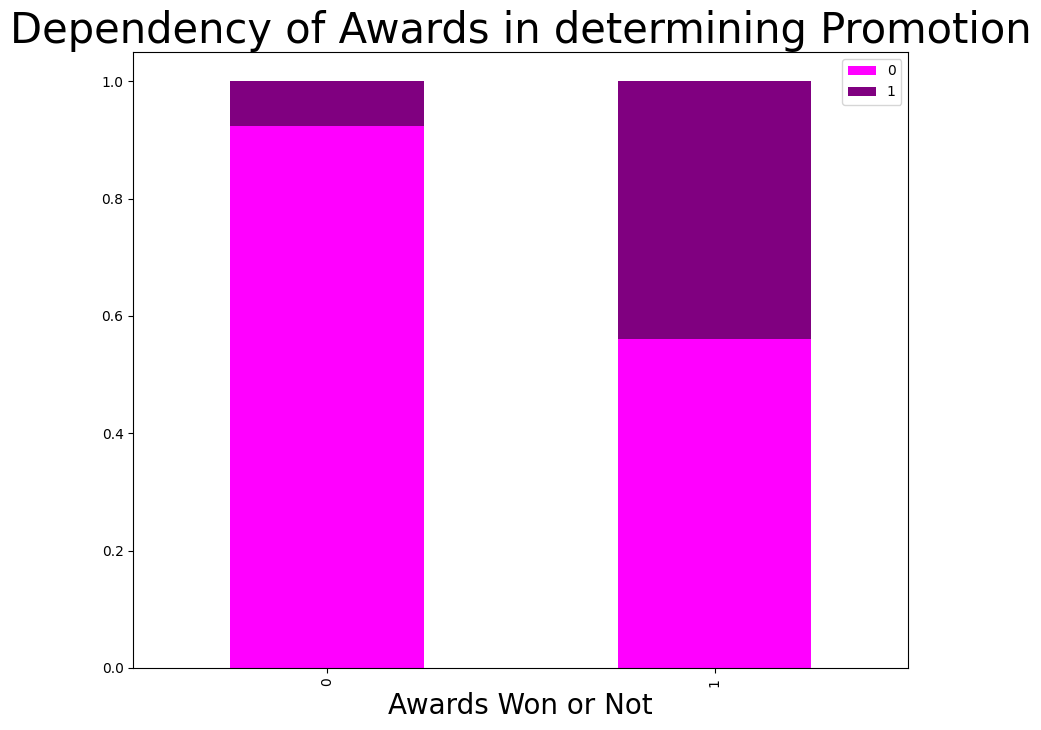

In [37]:
# dependency of awards won on promotion

data = pd.crosstab(df['awards_won?'], df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()


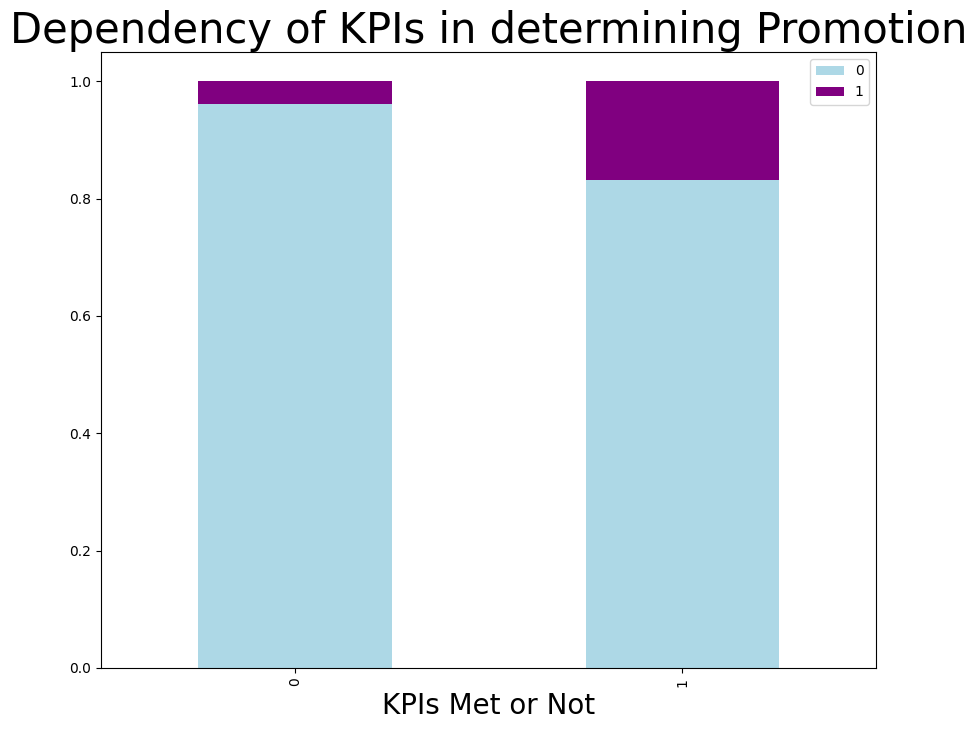

In [38]:
#dependency of KPIs with Promotion

data = pd.crosstab(df['KPIs_met >80%'], df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()



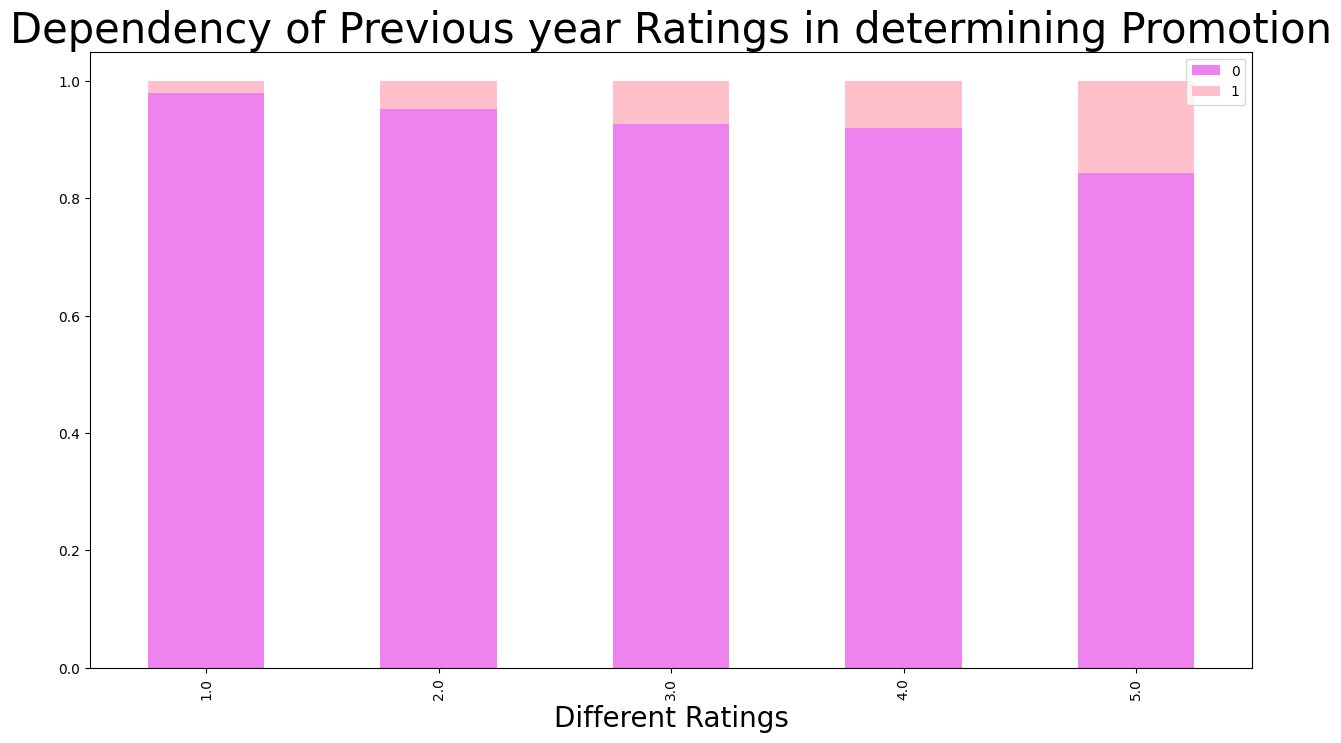

In [39]:
# checking dependency on previous years' ratings

data = pd.crosstab(df['previous_year_rating'], df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['violet', 'pink'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

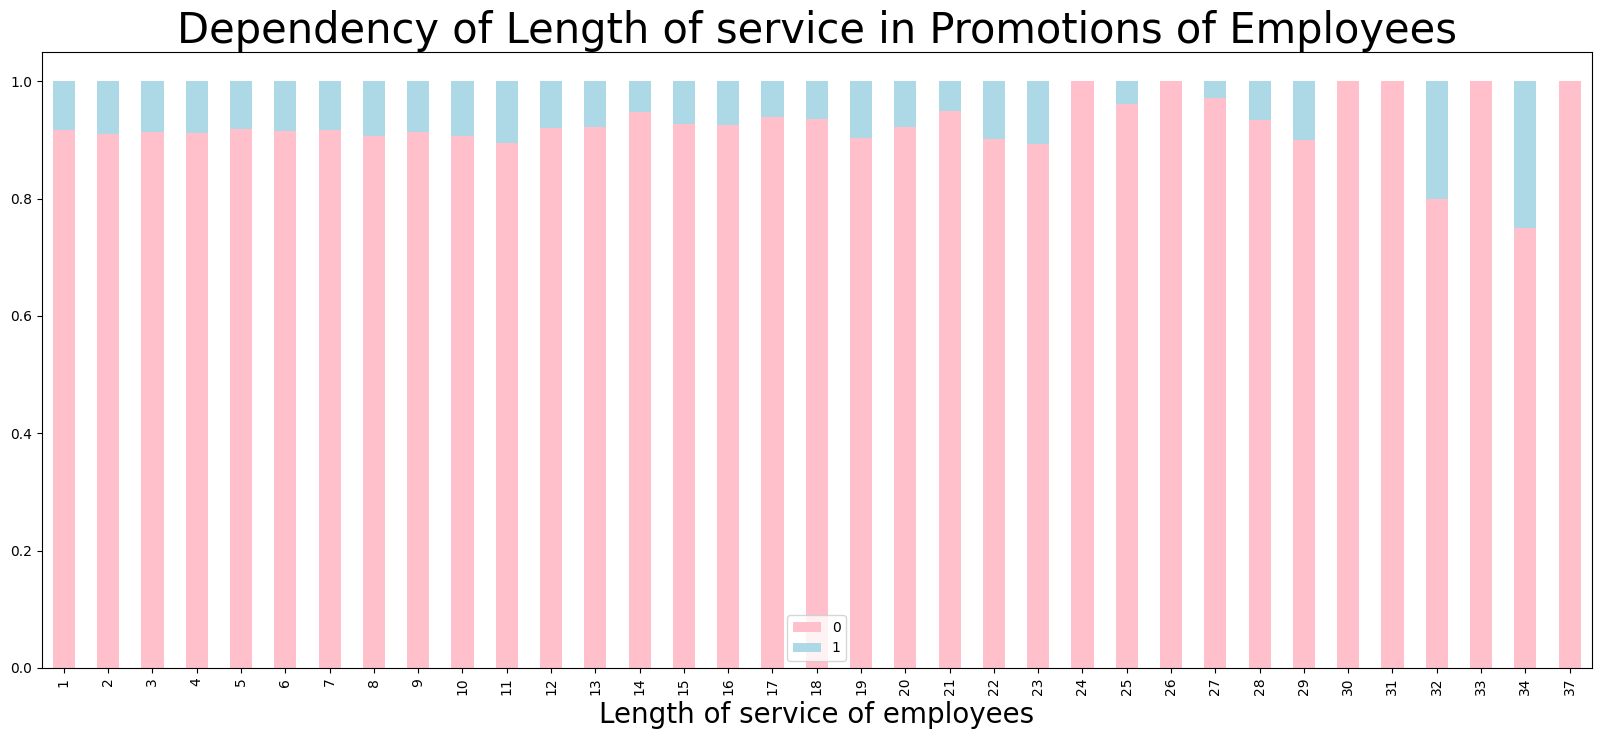

In [40]:
# checking how length of service determines the promotion of employees

data = pd.crosstab(df['length_of_service'], df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['pink', 'lightblue'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()


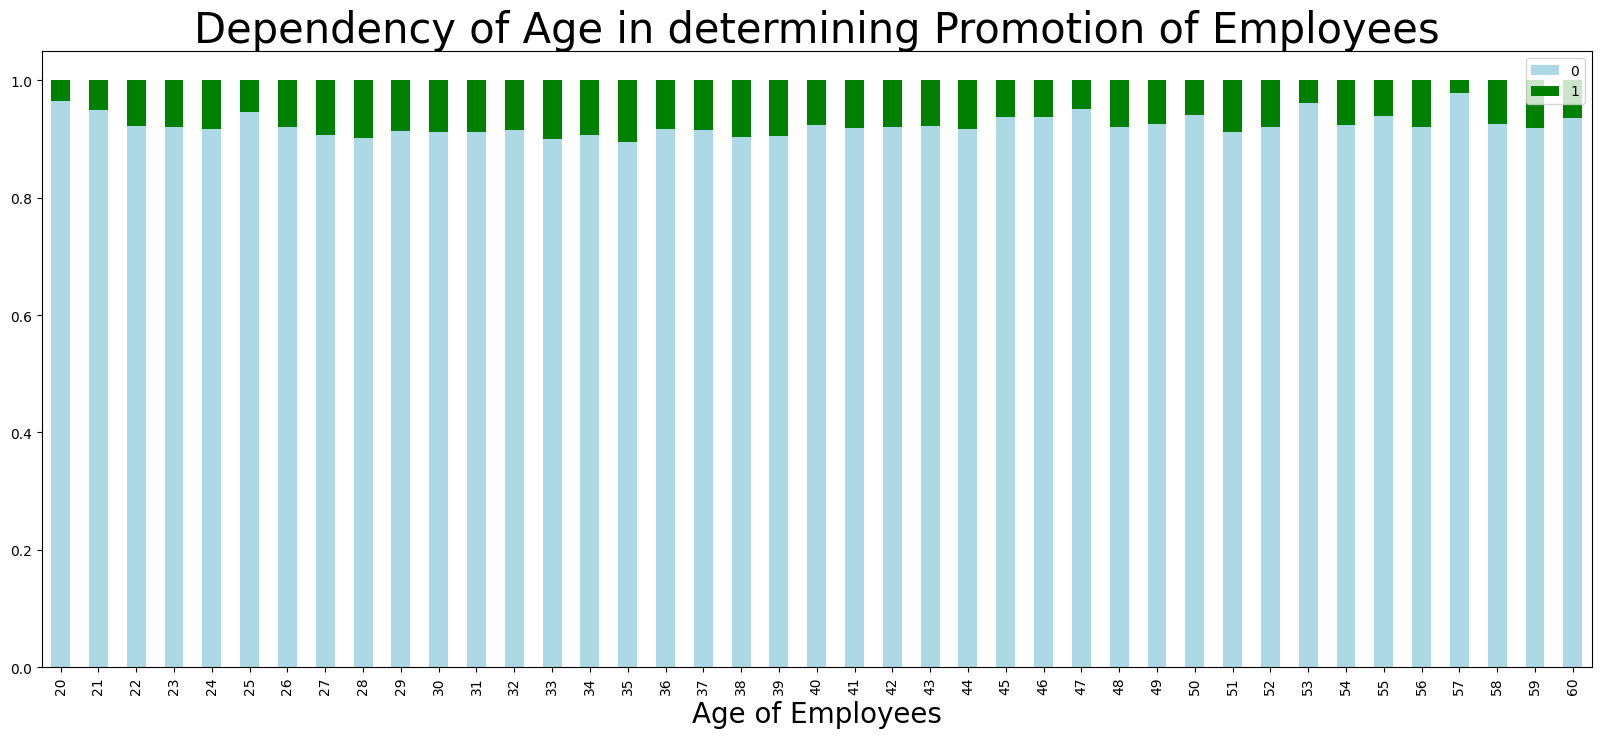

In [42]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(df['age'], df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

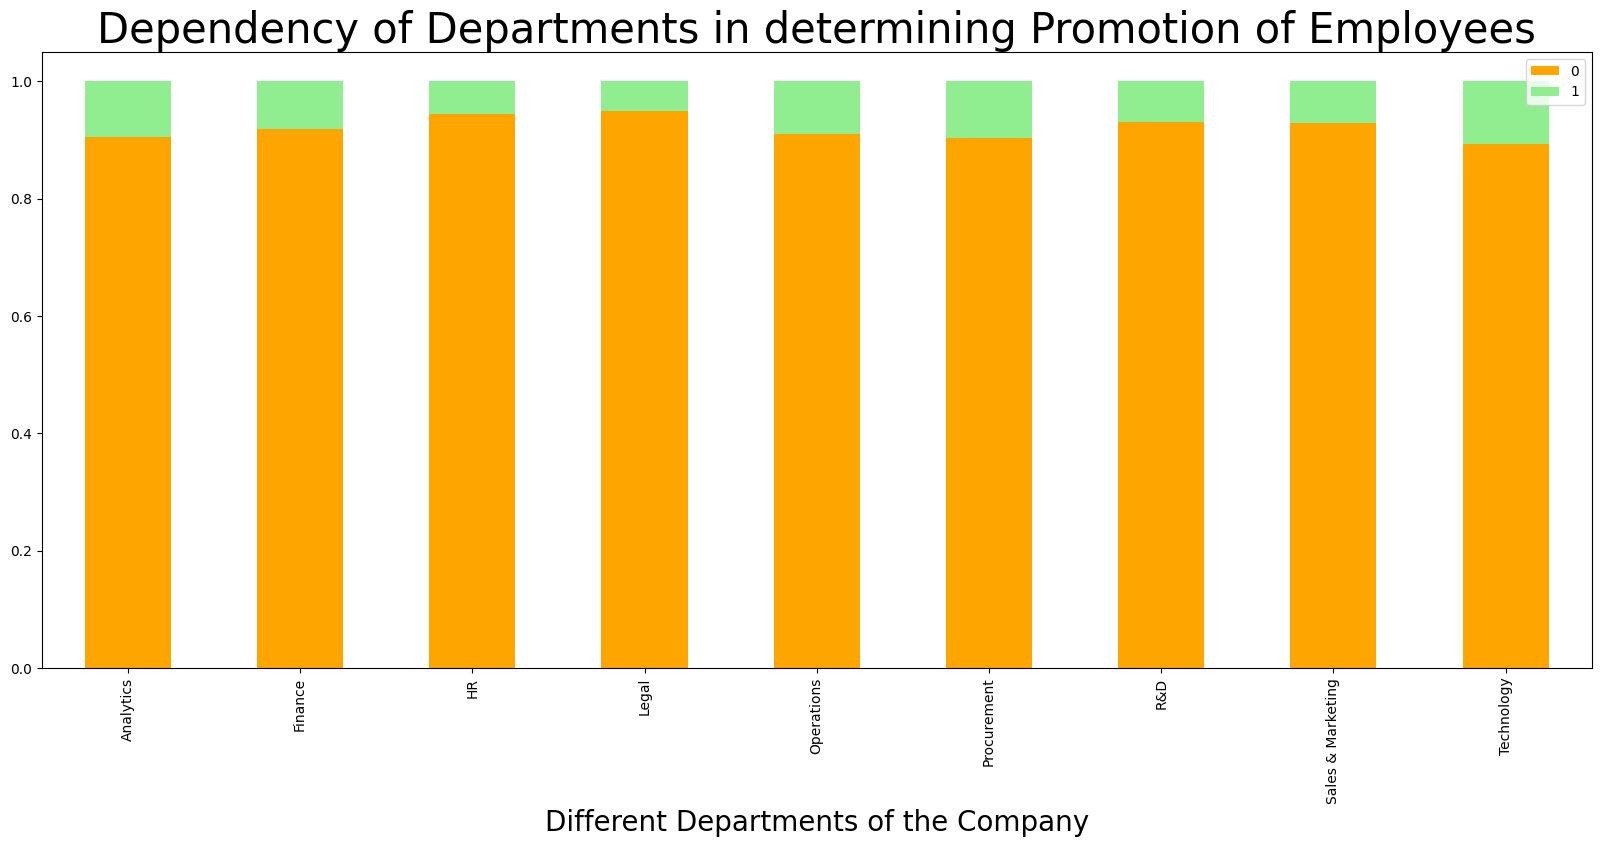

In [43]:
# checking which department got most number of promotions

data = pd.crosstab(df['department'], df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

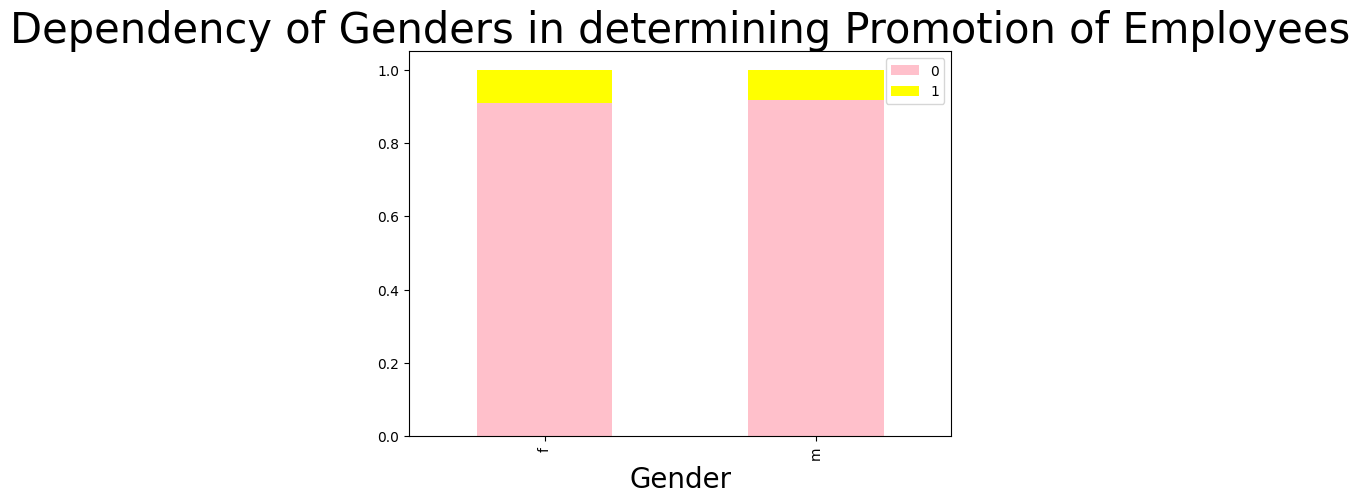

In [44]:
# checking dependency of gender over promotion

data = pd.crosstab(df['gender'], df['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()